In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-detection/fashion-mnist_test.csv
/kaggle/input/digit-detection/fashion-mnist_train.csv


In [2]:
def output(x_org):
    unique=np.unique(x_org.label)
    labels=np.zeros((x_org.shape[0],10))
    for i,val in enumerate(unique):
        labels[:,i]=np.where(x_org.label==val,1,0)
    return labels
x_org=pd.read_csv("/kaggle/input/digit-detection/fashion-mnist_train.csv")
test=pd.read_csv("/kaggle/input/digit-detection/fashion-mnist_test.csv")
test_y=(output(test))
test_x=((test).T)[1:]
labels=output(x_org)
x=(x_org.T)[1:]
labels=labels.T
labels.shape
#x.drop("label",axis=1,inplace=True)
#labels.shape
#x.shape
def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

In [3]:

def params(x, h, label):
    w1 = np.random.randn(h, x.shape[0])*0.01
    w2 = np.random.randn(label.shape[0], h)*0.01
    b1 = np.zeros((h, 1))
    b2 = np.zeros((label.shape[0], 1))
    parameters = {
        "w1": w1,
        "w2": w2,
        "b1": b1,
        "b2": b2
    }
    return parameters


def forward_propagation(parameters, x):
    z1 = np.dot(parameters["w1"], x) + parameters["b1"]
    a1 = np.tanh(z1)
    z2 = np.dot(parameters["w2"], a1) + parameters["b2"]
    a2 = softmax(z2)
       
    forward = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return forward



def backward_propagation(x, y, parameters,forward):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    a1 = forward['a1']
    a2 = forward['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

def update_parameters(parameters, gradients, learning_rate):
    parameters["w2"] = parameters["w2"] - learning_rate * gradients["dw2"]
    parameters["w1"] = parameters["w1"] - learning_rate * gradients["dw1"]
    parameters["b2"] = parameters["b2"] - learning_rate * gradients["db2"]
    parameters["b1"] = parameters["b1"] - learning_rate * gradients["db1"]
    return parameters




In [4]:
def leaky_relu(coef, z):
    return np.maximum(0, z)

def softmax(z):
    expz = np.exp(z)  # Subtracting max to improve numerical stability
    return expz / np.sum(expz, axis=0)



In [5]:
def cost_func(pred, labels):
    m = labels.shape[1]
    cost = -(1/m)*np.sum(labels*np.log(pred))
    return cost


In [6]:
def model(x, labels, learning_rate, iterations):
    parameters = params(x, 1000, labels)
    cost=[]
    for i in range(iterations):
        forward = forward_propagation(parameters,x)
        cost.append(cost_func(forward['a2'], labels))
        gradients = backward_propagation(x, labels, parameters, forward)
        parameters = update_parameters(parameters, gradients, learning_rate)
    return parameters,cost



In [7]:
learned_parameters,cost = model(x, labels, 0.03, 200)


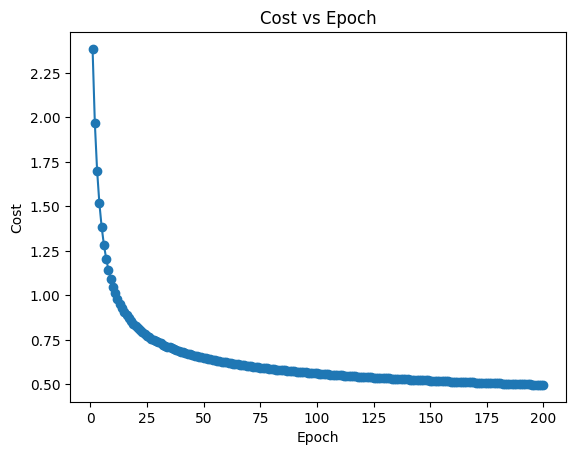

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(cost) + 1), cost, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs Epoch')
plt.show()

def test(test_x,test_y,parameters):
    forward=forward_propagation(parameters,test_x)
    output_vals=forward["a2"]
    output=np.argmax(output_vals,0)
    test_y=np.argmax(test_y,0)
    print(output.shape)
    print(test_y.shape)
    accuracy = np.mean(output== test_y)*100
    print("the accuracy is: ",accuracy)

In [9]:
test(x,labels,learned_parameters)
test(test_x,test_y.T,learned_parameters)

(60000,)
(60000,)
the accuracy is:  82.96833333333333
(10000,)
(10000,)
the accuracy is:  82.93
